## 신경망 개요
# 경사하강법 (Gradient Descent)

<img src="도표04.jpg" />

- w 값을 줄일것인가 늘릴것인가?
- 기울기를 알면 방향을 잡을 수 있다
$$ w_{new} = w - learning\_rate \cdot slope(w,b) $$
$$ slope(w,b) = {\partial Loss(w,b) \over \partial w} $$

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 선형회귀 (속성이 1개일 때) 경사하강법
- 중간층 없이, 입력층과 출력층만 있음
- 활성화함수 없음
- 비용함수는 MSE
- w 와 b 는 한개씩

$$ \hat{y}_i = w \cdot x_i + b \\
Loss = {1 \over N} \sum_i (y_i - \hat{y}_i)^2 \\
= {1 \over N} \sum_i (y_i - (w \cdot x_i + b))^2 $$

$$ {\partial Loss \over \partial w} = -{2 \over N} \sum_i (y_i - \hat{y}_i) \cdot x_i \\
{\partial Loss \over \partial b} = -{2 \over N} \sum_i (y_i - \hat{y}_i) \\
w_{new} = w - lr \cdot {\partial Loss \over \partial w}
= w + lr \cdot {2 \over N} \sum_i (y_i - \hat{y}_i) \cdot x_i \\
b_{new} = b - lr \cdot {\partial Loss \over \partial b}
= b + lr \cdot {2 \over N} \sum_i (y_i - \hat{y}_i) $$

- iris 데이터에서 petal length 와 petal width 에 대해 선형회귀 적용

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()

In [10]:
x = iris.data[:,2]
y = iris.data[:,3]

In [9]:
w = np.random.randn()
b = np.random.randn()
lr = 0.01

In [10]:
pred_y = x*w + b

In [12]:
mse = np.mean((y-pred_y)**2)
mse

75.3868108933482

In [13]:
dw = lr*2/len(y)*np.sum((y-pred_y)*x)
dw

-0.716689601780448

In [14]:
db = lr*2/len(y)*np.sum(y-pred_y)
db

-0.16388913182883127

In [15]:
w = w + dw
b = b + db

In [16]:
pred_y = x*w + b

In [17]:
mse = np.mean((y-pred_y)**2)
mse

31.09122489163435

> 반복 적용

In [20]:
w = np.random.randn()/10
b = np.random.randn()/10
lr = 0.05

pred_y = x*w + b
mse = np.mean((y-pred_y)**2)
costs = [mse]

for i in range(3000):
    pred_y = x*w + b
    dw = lr*2/len(y)*np.sum((y-pred_y)*x)
    db = lr*2/len(y)*np.sum(y-pred_y)
    
    w_new = w + dw
    b_new = b + db
    mse_new = np.mean((y-(x*w_new + b_new))**2)
    if mse_new>=mse: break
        
    w = w_new
    b = b_new
    mse = mse_new
    costs.append(mse)
    
print(i, w, b, mse)

928 0.4164191221911922 -0.36651399943114227 0.042289946319484614


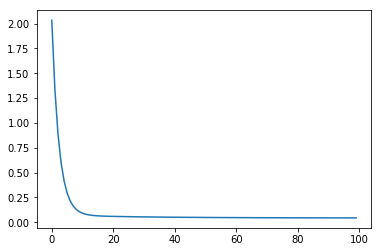

In [21]:
plt.plot(costs[:100])

In [3]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
model.coef_, model.intercept_

(array([0.41641913]), -0.3665140452167275)